In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 6)

In [62]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

As you can see below, there are a fair amount of missing values, so we'll need to handle that before training a model.

In [63]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [64]:
test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

## Sale Price

Our target variable is sales price, so let's look at that first.

/home/ryanryanadmin/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/home/ryanryanadmin/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


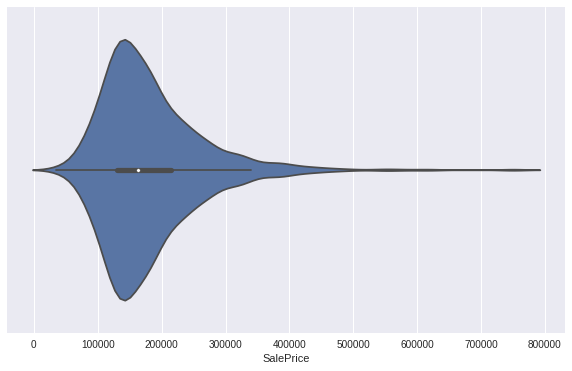

In [65]:
sns.violinplot(train.SalePrice)

/home/ryanryanadmin/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


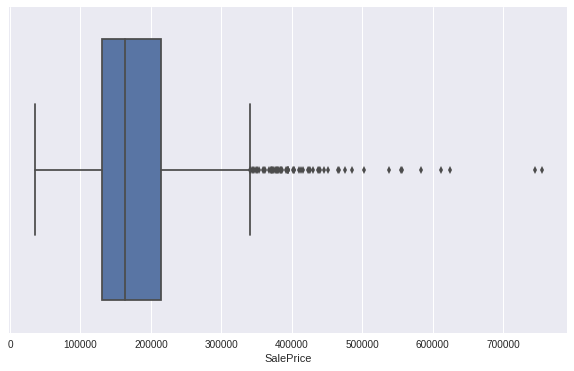

In [66]:
sns.boxplot(train.SalePrice)

As you can see above, our distribution is right skewed with a very long tail. As others who have explored this dataset have pointed out, we should log transform this variable before fitting a regression model. Let's try that transform and see how it looks:

/home/ryanryanadmin/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/home/ryanryanadmin/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


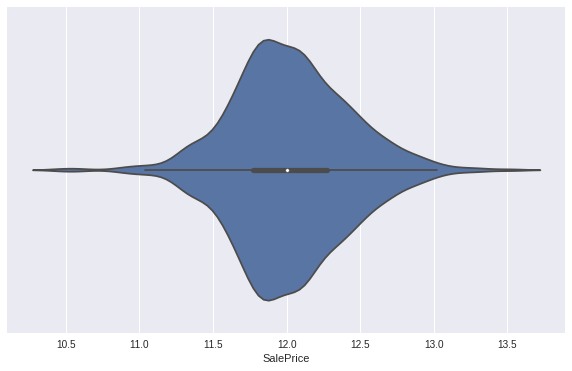

In [67]:
sns.violinplot(train.SalePrice.apply(np.log))

Not perfect, but it looks more symetrical. 

## Continuous, Interval and Ordinal Features

Let's select our numeric variables and write a helper function to help us plot them.

In [68]:
numeric = train.select_dtypes(exclude=['object']).drop(['MSSubClass', 'Id'], axis=1)

def plotNumericVar(var):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(14, 6))
    mean = numeric[var].mean()
    std = numeric[var].std()
    
    #to make some plots clearer, we will remove outliers, which we define as data points
    #3 or more standard deviations above or below the mean
    no_outliers = numeric[numeric[var].apply(lambda x: np.abs(x- mean) /std < 3)]
    
    sns.distplot(numeric[var], kde=False, ax=ax1)
    ax1.set_title('Distribution of {}'.format(var))
    
    sns.regplot(var, 'SalePrice', data=numeric, fit_reg=True, ax=ax2)
    ax2.set_title('{} vs. SalePrice (outliers included)'.format(var))
    sns.regplot(var, 'SalePrice', data=no_outliers, fit_reg=True, ax=ax3)
    ax3.set_title('{} vs. SalePrice (outliers removed)'.format(var))
    plt.tight_layout()

We'll start by looking at some correlations to get a sense of how our features may relate to each other and to the target variable.

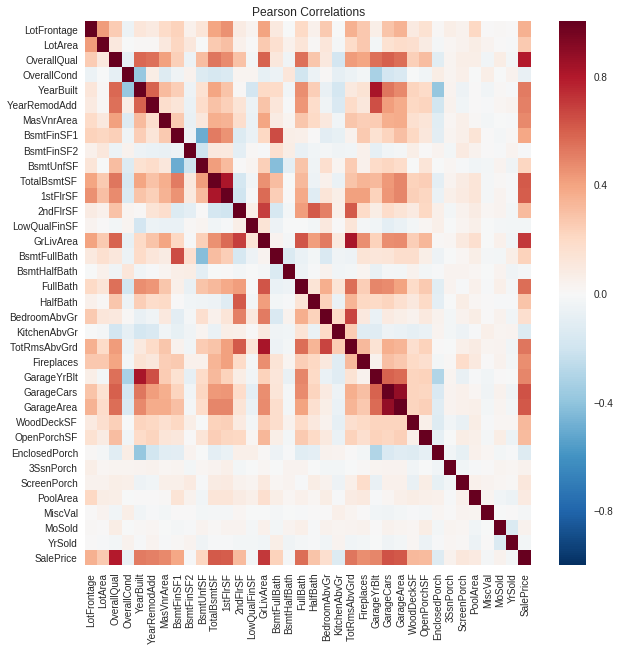

In [69]:
pearson = numeric.corr(method='pearson')
fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.heatmap(pearson, ax=ax)
ax.set_title('Pearson Correlations')

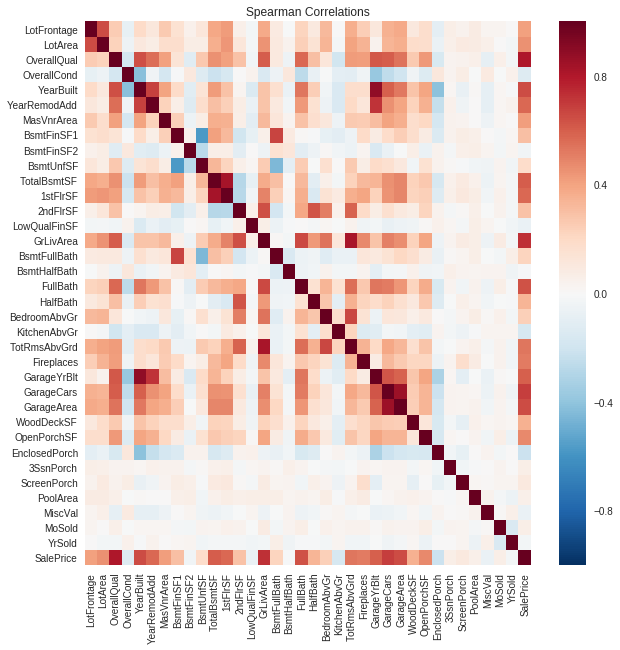

In [70]:
spearman = numeric.corr(method='spearman')
fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.heatmap(spearman, ax=ax)
ax.set_title('Spearman Correlations')

Overall quality seems to be the feature that correlates most strongly (positively) with sale price. Interestingly, overall condition is slightly negatively correlated with price. Features related to square footage, garage space and the age of the house (year built and remodeled) also show strong, positive correlations.

We also see positive correlations between some of the predictor variables that make sense intuitively. Features that correspond to garage size are highly positively correlated. Variables that correspond to lot area are correlated, and GrlLivingArea (the square footage above ground) correlates with number of rooms above ground. 


Let's look more closely at some of the features most strongly associated with sales price.

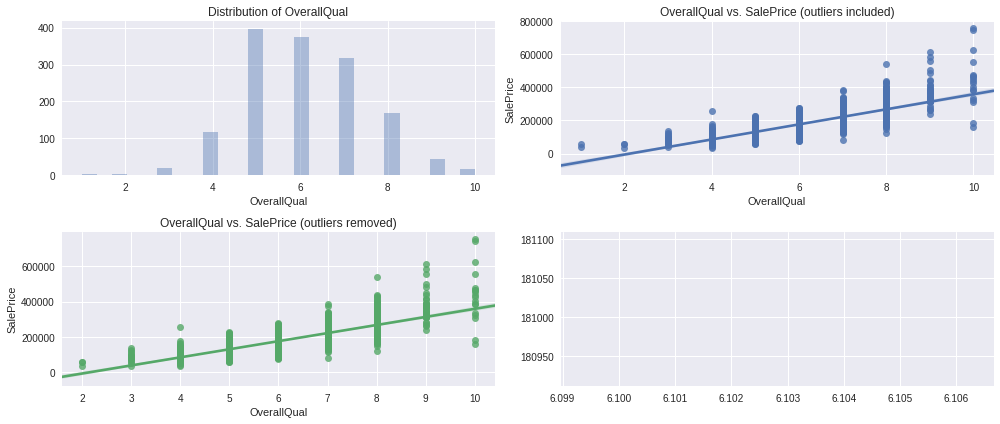

In [71]:
plotNumericVar('OverallQual')

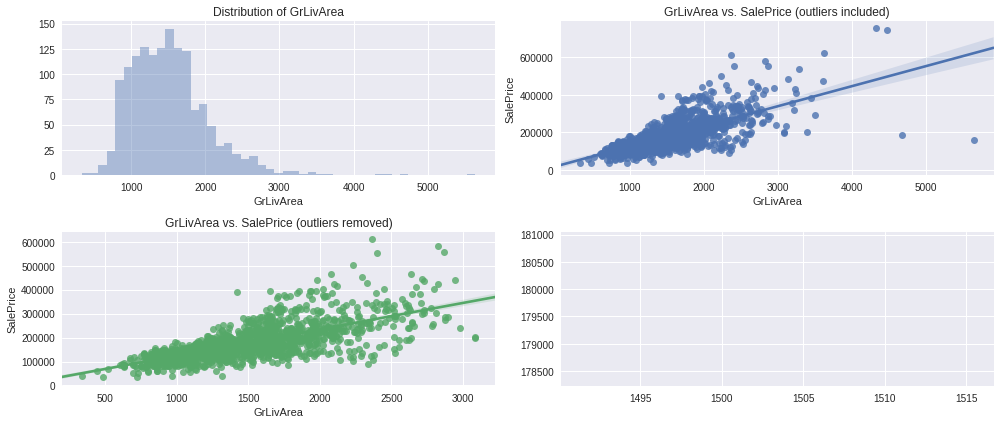

In [72]:
plotNumericVar('GrLivArea')

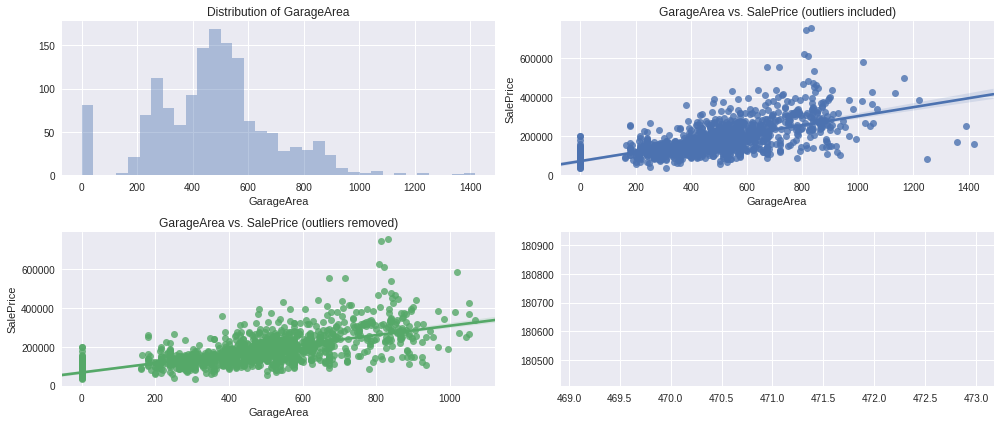

In [73]:
plotNumericVar('GarageArea')

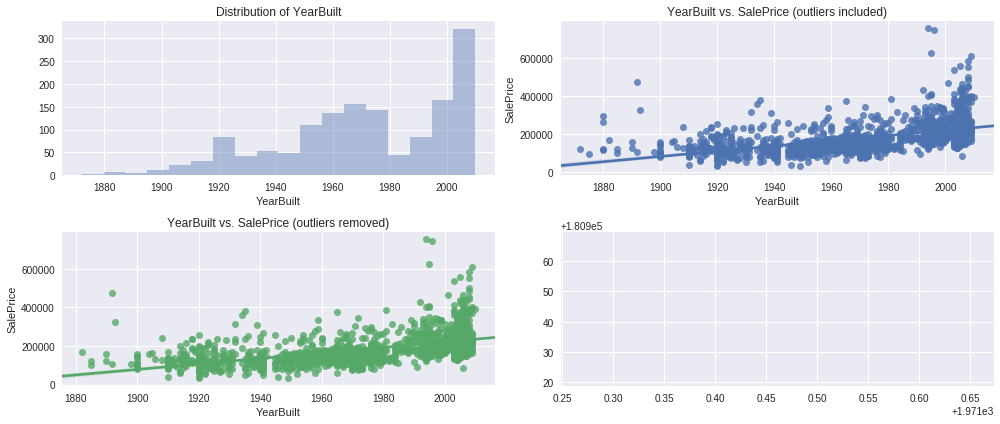

In [74]:
plotNumericVar('YearBuilt')

A few observations on the plots above:
- We see heteroscedasticity in the GrLivingArea and GarageArea plots. As their values increase, the spread of SalesPrice around the fitted line also increases.
- In the year built plot, we see that newer homes typicaly sell for more. However, we also see that very old homes can also fetch a relatively high price. There could be a number of reasons for this: the scarcity of those homes on the market, the added value of something being 'historic', or perhaps something intrisincally desirable that has helped them survive that long.

## Categorical Variables

Now let's move on to our categorical variables.

In [75]:
categorical_columns = train.select_dtypes(include=['object']).columns.values
categorical_columns = np.concatenate((categorical_columns,['SalePrice', 'MSSubClass']))
categorical = train[categorical_columns]

Let's fill missing values before plotting, as missing values may have some relationship with sale price.  

In [76]:
categorical = categorical.fillna('None')

A helper for plotting.

In [77]:
def plotCategorical(var, order=None):
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,10))
    ax1.set_title('Counts for {}'.format(var))
    if order:
        sns.countplot(categorical[var], ax=ax1, order=order)
        sns.boxplot(var, 'SalePrice', data=categorical,ax=ax2, order=order)
    else:
        sns.countplot(categorical[var], ax=ax1)
        sns.boxplot(var, 'SalePrice', data=categorical,ax=ax2)
    ax2.set_title('{} vs Sale Price'.format(var))

If you want to see plots for all the variables, you can uncomment and run the code at the bottom of this notebook. But for simplicity, let's just look at a few of the variables I found interesting.

Not surprisingly, features that measured quality seemed to be fairly strongly associated with sale price.

/home/ryanryanadmin/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/home/ryanryanadmin/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


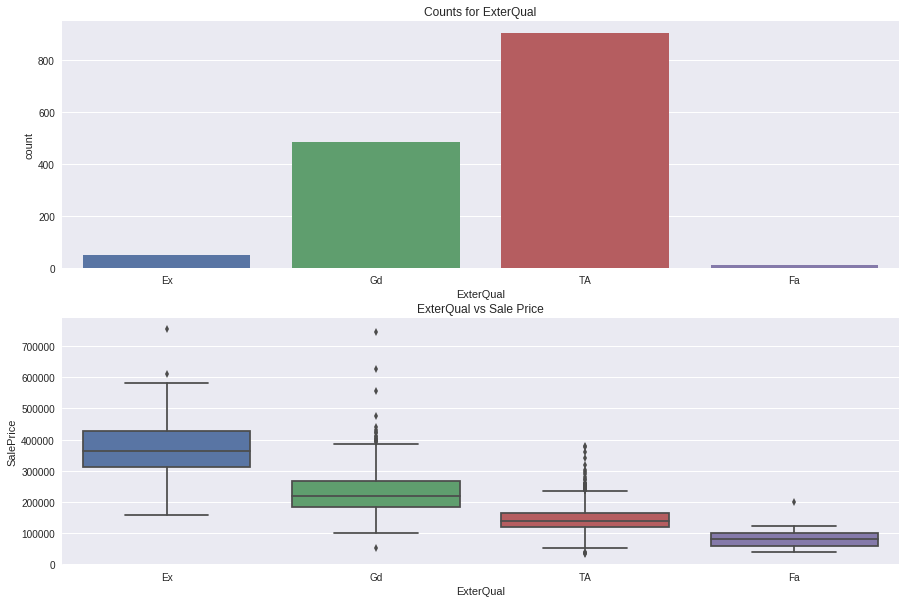

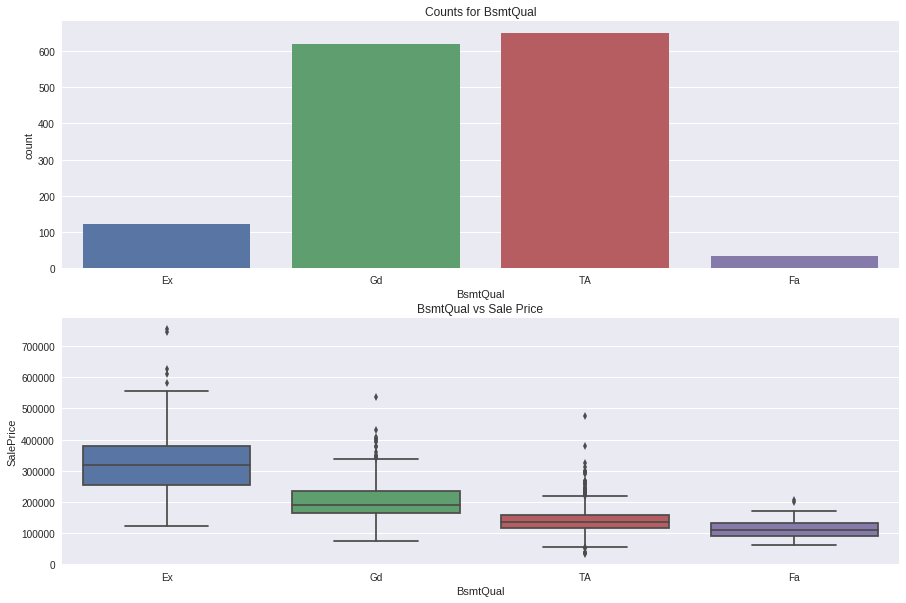

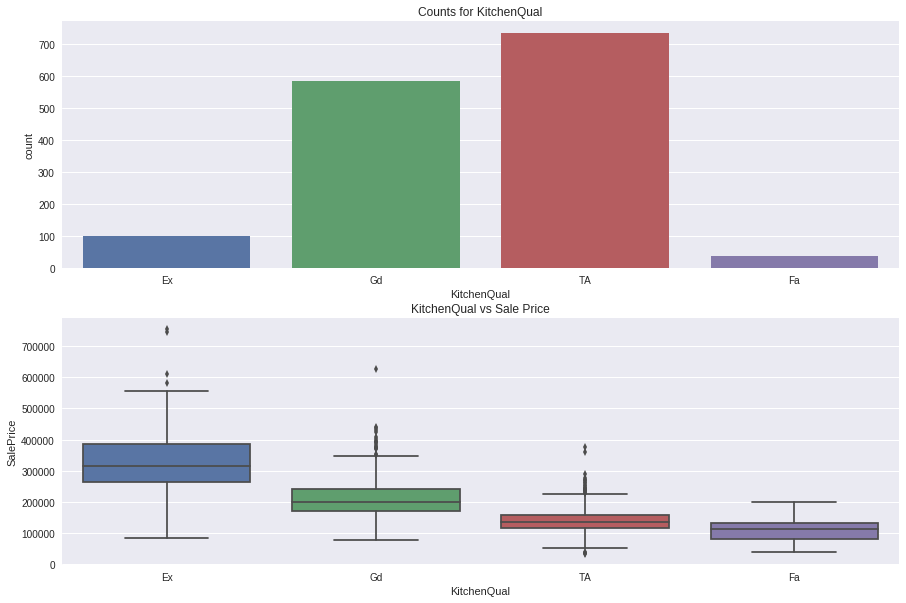

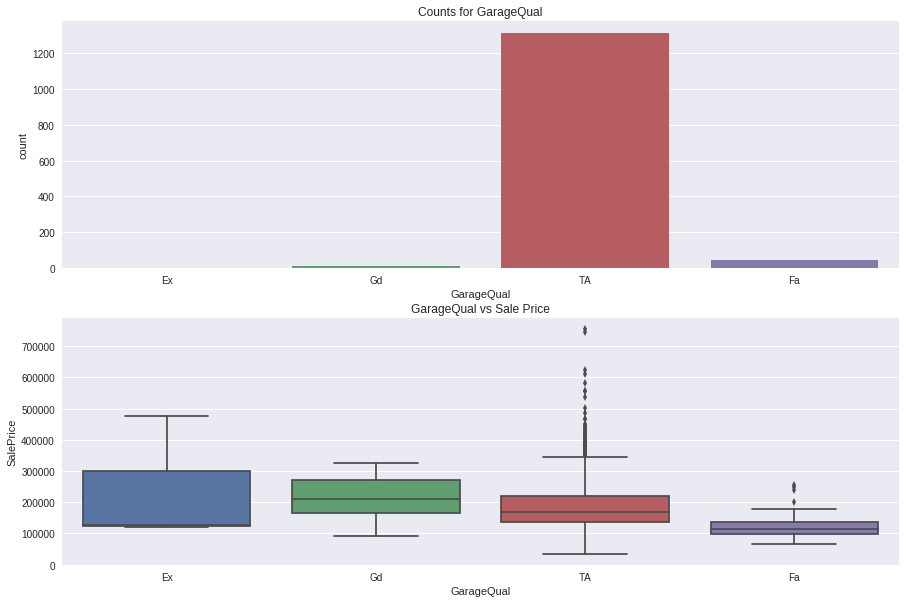

In [78]:
for col in [col for col in categorical.columns.values if 'Qual' in col]:
    plotCategorical(col, order=['Ex', 'Gd', 'TA', 'Fa'])
    plt.show()

Neigborhood seems to be related with price as well. It's a variable I'd like to explore further.

/home/ryanryanadmin/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/home/ryanryanadmin/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


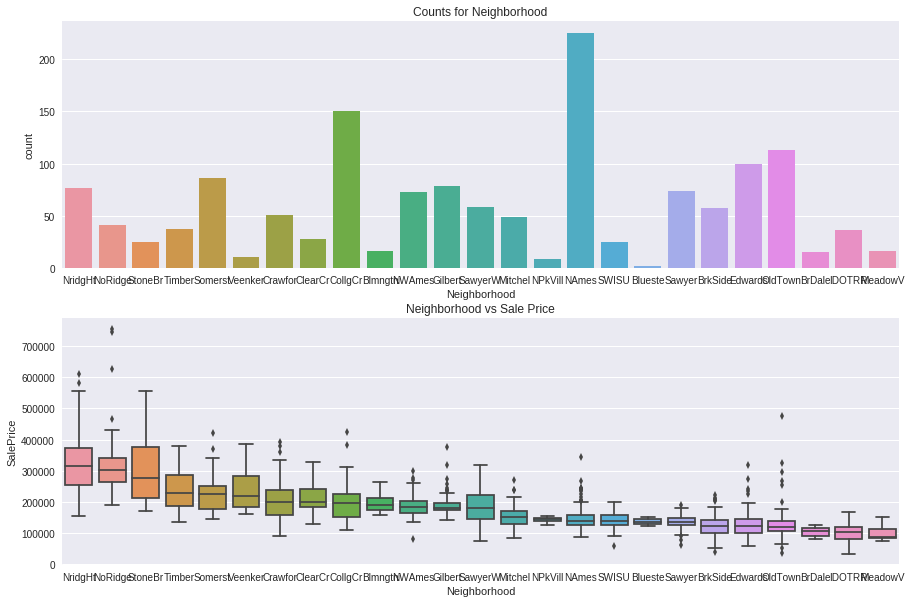

In [79]:
order = list(categorical.groupby('Neighborhood').SalePrice.median().sort_values(ascending=False).index.values)
plotCategorical('Neighborhood', order = order)
plt.show()

Features related to garage could have some predictive power.

/home/ryanryanadmin/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/home/ryanryanadmin/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


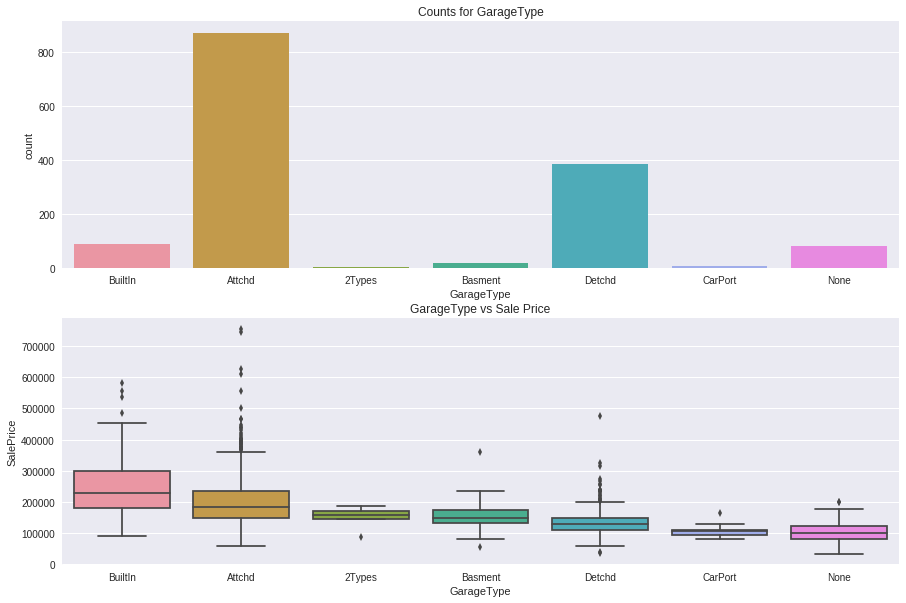

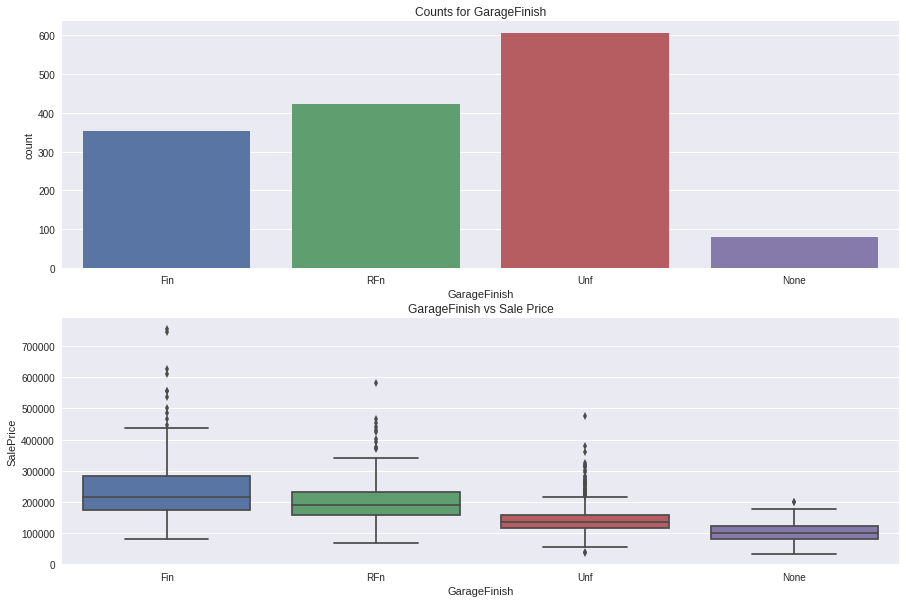

In [80]:
for col in ['GarageType', 'GarageFinish']:
    order = list(categorical.groupby(col).SalePrice.median().sort_values(ascending=False).index.values)
    plotCategorical(col, order)
    plt.show()

## See more plots

Uncomment and run the code below to see plots for all the variables.

In [279]:
'''
for col in numeric.columns:
    plotNumericVar(col)
    plt.tight_layout()
    plt.show()n
'''

'\nfor col in numeric.columns:\n    plotNumericVar(col)\n    plt.tight_layout()\n    plt.show()\n'

In [278]:
'''
for col in [col for col in categorical.columns.values if 'Qual' in col]:
    plotCategorical(col)
    plt.show()
'''

"\nfor col in [col for col in categorical.columns.values if 'Qual' in col]:\n    plotCategorical(col)\n    plt.show()\n"